In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('survey_dataset.csv');
df.head(5)

,Timestamp,Age,Sex,Height in (cm),Weight in (kilograms)
0,2023/03/18 1:41:28 PM GMT+8,21,Female,158.0,47
1,2023/03/18 1:41:32 PM GMT+8,20,Male,180.0,54
2,2023/03/18 1:41:52 PM GMT+8,20,Male,178.0,85
3,2023/03/18 1:41:57 PM GMT+8,21,Male,152.4,43
4,2023/03/18 1:42:00 PM GMT+8,21,Male,165.0,89


In [3]:
df.shape

(100, 5)

In [4]:
df.drop(['Timestamp'],axis = 1, inplace = True)

In [5]:
df.isna().sum()

Age                      0
Sex                      0
Height in (cm)           0
Weight in (kilograms)    0
dtype: int64

In [6]:
def removeOutliers(df,col):
    q3 = df[col].quantile(0.75);
    q1 = df[col].quantile(0.25);
    iqr = q3 -q1;
    max_ = q3 + (iqr * 1.5);
    min_ = q1 - (iqr * 1.5);
    df.loc[df[col] > max_,col] = max_;
    df.loc[df[col] < min_,col] = min_;

In [7]:
df.dtypes

Age                        int64
Sex                       object
Height in (cm)           float64
Weight in (kilograms)      int64
dtype: object

In [8]:
for col in df.columns:
    if (df[col].dtypes != 'object'):
        removeOutliers(df,col)

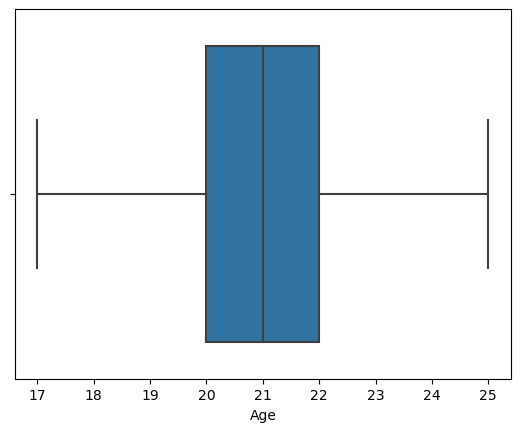

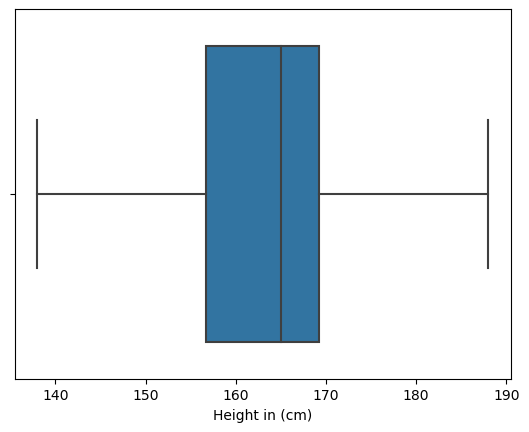

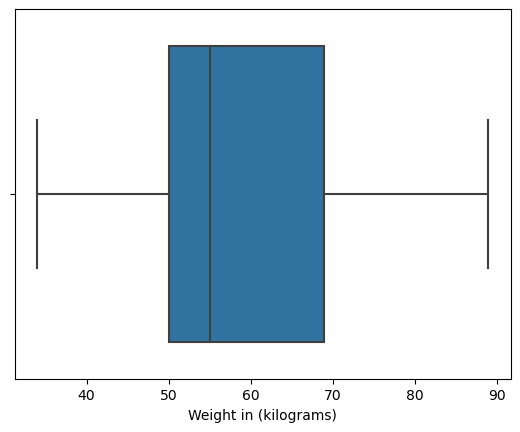

In [9]:
for col in df.columns:
    if (df[col].dtypes != 'object'):
        plt.figure();
        sns.boxplot(df[col])

In [10]:
df['Sex'] = df['Sex'].map({'Male':0, 'Female':1})

In [11]:
df

,Age,Sex,Height in (cm),Weight in (kilograms)
0,21,1,158.0,47.0
1,20,0,180.0,54.0
2,20,0,178.0,85.0
3,21,0,152.4,43.0
4,21,0,165.0,89.0
...,...,...,...,...
95,25,0,188.0,50.0
96,22,0,174.0,65.0
97,21,0,160.0,45.0
98,25,0,175.0,65.0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(['Weight in (kilograms)'], axis=1);
y = df['Weight in (kilograms)'];

In [14]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=.80);

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [16]:
def evaluate_model(model,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,
                                                 train_size=.80);
    
    model.fit(X_train, y_train);
    
    y_pred = model.predict(X_test);
    print('r^2 Score: ', r2_score(y_test, y_pred)) # accuracy score
    print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)); #closer to zero, better
    print('Root Mean Square Eror: ', np.sqrt(mean_squared_error(y_test, y_pred)))  #closer to zero, better
    
    plt.scatter(y_train, model.predict(X_train), color='teal')
    plt.plot(y_pred, y_pred)
    plt.show()

r^2 Score:  0.19662253351767411
Mean Absolute Error:  9.583063095238098
Root Mean Square Eror:  11.909504259517046


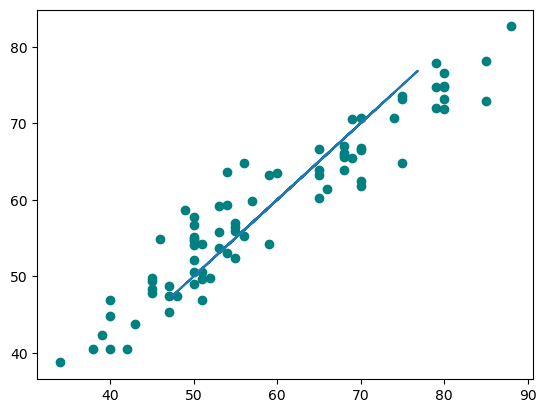

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
evaluate_model(rf,X,y)

In [18]:
import pickle;

dbfile = open('weightmodel.sav', 'wb');
pickle.dump(rf,dbfile);

In [19]:
# params = pd.DataFrame([[22,0,147]])

In [20]:
# res = model.predict(params)

In [21]:
# res[0]

In [22]:
# df